In [1]:
# %load import.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql as mysql
import urllib.request
import json
from collections import Counter
from datetime import datetime as dt
from pylab import mpl 

%matplotlib inline
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')


## chapter 2 usa.gov

In [4]:
path = 'c://Users/tcsd/Desktop/MyDataWork/Jupyter files/ch2.txt'

In [5]:
records = [json.loads(line) for line in open(path)]

In [6]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec] #list comprehension

In [7]:
counts = Counter(time_zones) #collections标准库计数

In [8]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [9]:
frame = pd.DataFrame(records)

In [10]:
tz_counts = frame['tz'].value_counts() #pandas计数

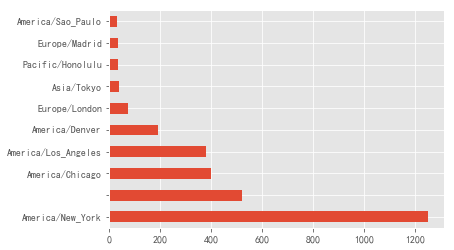

In [11]:
tz_counts[:10].plot(kind='barh', rot=0)

In [12]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [13]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [14]:
cframe = frame[frame.a.notnull()]

In [15]:
operating_sys = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

In [16]:
operating_sys[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [23]:
by_tz_os = cframe.groupby(['tz', operating_sys])

In [26]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [33]:
indexer = agg_counts.sum(axis=1).argsort()

In [34]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

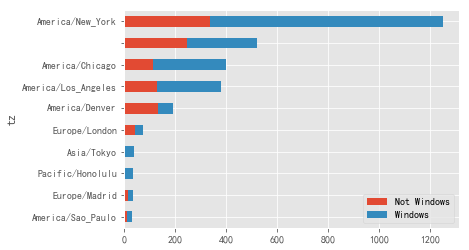

In [43]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset.plot(kind='barh',stacked=True)

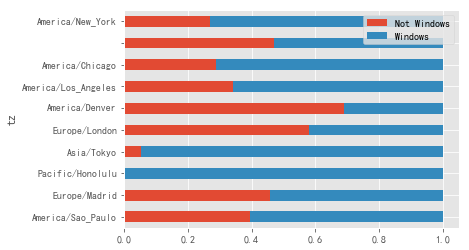

In [45]:
normed_subset = count_subset.div(count_subset.sum(1),axis=0)
normed_subset.plot(kind='barh',stacked=True)

## chapter 2 movielens 

In [15]:
unames = ['user_id','gender','age','occupation','zip']
mnames = ['movie_id','title','genres']
rnames = ['user_id','movie_id','rating','timestamp']

In [16]:
users = pd.read_table('c://Users//tcsd//Desktop//MyDataWork//Jupyter files//python for data wrangling//users.dat', sep = '::',names = unames,engine='python')
movies = pd.read_table('c://Users//tcsd//Desktop//MyDataWork//Jupyter files//python for data wrangling//movies.dat', sep = '::',names = mnames,engine='python')
ratings = pd.read_table('c://Users//tcsd//Desktop//MyDataWork//Jupyter files//python for data wrangling//ratings.dat', sep = '::',names = rnames,engine='python')

In [17]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [18]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [20]:
data = pd.merge(pd.merge(ratings, users),movies)

In [47]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [55]:
mean_ratings = data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')

In [56]:
ratings_by_title = data.groupby('title').size()
active_titles = ratings_by_title[ratings_by_title >=250]
mean_ratings = mean_ratings.iloc[active_titles]
mean_ratings

gender,F,M
title,,
Bandit Queen (1994),4.000000,3.600000
Barney's Great Adventure (1998),1.000000,NaN
Best of the Best 3: No Turning Back (1995),NaN,1.333333
Bed of Roses (1996),2.933333,3.200000
"Beautician and the Beast, The (1997)",2.222222,1.923077
Chicken Run (2000),3.989474,3.901288
Bambi (1942),3.838710,3.819672
Band of the Hand (1986),NaN,2.000000
"Blood Spattered Bride, The (La Novia Ensangrentada) (1972)",NaN,1.000000


In [61]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings.head(10)

gender,F,M
title,,
Ben-Hur (1959),4.315789,4.162791
"Bicycle Thief, The (Ladri di biciclette) (1948)",4.285714,4.280000
Bandit Queen (1994),4.000000,3.600000
Barry Lyndon (1975),4.000000,3.888889
"Big Country, The (1958)",4.000000,3.800000
Bananas (1971),4.000000,4.000000
Bronco Billy (1980),4.000000,2.529412
"Band Wagon, The (1953)",4.000000,4.400000
Bamboozled (2000),4.000000,2.733333


In [74]:
ratings_std_by_title = data.groupby('title')['rating'].std()

In [76]:
ratings_std_by_title = ratings_std_by_title.iloc[active_titles].sort_values()[:10]

In [77]:
ratings_std_by_title

title
Best Laid Plans (1999)                             0.577350
Best of the Best 3: No Turning Back (1995)         0.577350
Bicycle Thief, The (Ladri di biciclette) (1948)    0.634206
Barefoot Executive, The (1971)                     0.707107
Bootmen (2000)                                     0.707107
Big Bully (1996)                                   0.707107
Big Country, The (1958)                            0.752773
Ben-Hur (1959)                                     0.773295
Big One, The (1997)                                0.779864
Big One, The (1997)                                0.779864
Name: rating, dtype: float64

## chapter 3 

In [ ]:
active_titles? #对象内省
fuction()?? #显示函数源代码